# Diabetes Prediction with RandomForest, XGBoost.

## About Dataset
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [1]:
# importing every modules here.
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
data.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
47031,Female,71.0,0,0,No Info,27.28,6.2,90,0
82163,Male,40.0,0,0,never,27.32,3.5,126,0
31653,Female,45.0,0,0,never,48.95,5.8,80,0
95677,Female,61.0,0,0,former,22.68,5.7,100,0
17448,Male,52.0,1,0,ever,28.11,6.5,240,1


In [4]:
data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


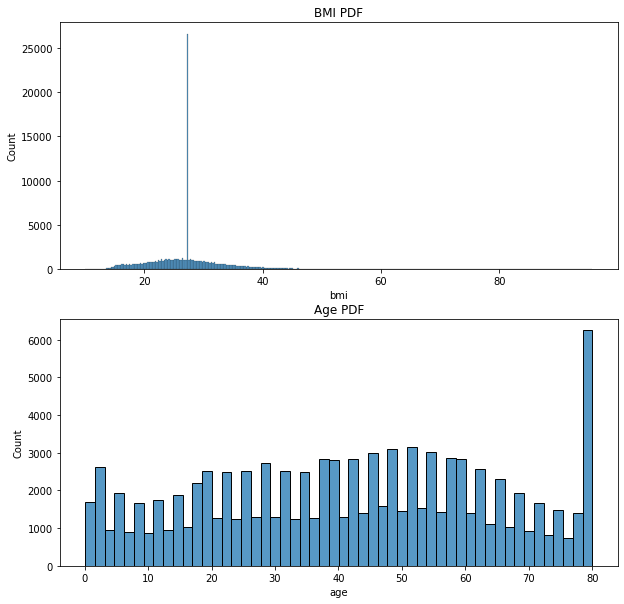

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.histplot(data['bmi'])
plt.title('BMI PDF')
plt.subplot(2,1,2)
sns.histplot(data['age'])
plt.title('Age PDF')
plt.show()

In [8]:
data.shape

(100000, 9)

In [9]:
cols=['gender','hypertension','heart_disease','smoking_history']

In [11]:
for i in cols:
    print(data[i].value_counts())

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
0    92515
1     7485
Name: hypertension, dtype: int64
0    96058
1     3942
Name: heart_disease, dtype: int64
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


In [12]:
data.drop(data[data['smoking_history'] == 'No Info'].index, inplace=True)

In [13]:
data.shape

(64184, 9)

In [14]:
X=data.drop('diabetes',axis=1)
y=data['diabetes']

In [15]:
X.shape,y.shape

((64184, 8), (64184,))

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [17]:
print(x_train.shape)
print(x_test.shape)

(51347, 8)
(12837, 8)


In [18]:
x_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
43396,Female,49.0,0,0,not current,45.69,3.5,160
98835,Female,63.0,1,0,never,27.62,4.8,200
89666,Female,31.0,0,0,ever,30.34,5.0,100
31586,Female,47.0,0,0,current,32.23,5.8,126
2828,Female,80.0,0,0,never,19.35,6.2,159


In [19]:
x_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

In [20]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [21]:
trf1=ColumnTransformer([
    ('OHE',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,4])
])

In [22]:
trf2=ColumnTransformer([
    ('MinMax',MinMaxScaler(),[1,5,6,7])
])

In [23]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [24]:
xtrain_transformed=pipe.fit_transform(x_train)

In [25]:
xbg=XGBClassifier(n_estimators=200,learning_rate=0.1)
xbg.fit(xtrain_transformed,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
xtest_transformed=pipe.transform(x_test)

In [27]:
ypred=xbg.predict(xtest_transformed)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.889226454779154

In [29]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(xtrain_transformed, y_train)
y_pred_rf = rf.predict(xtest_transformed)

In [30]:
accuracy_score(y_test,y_pred_rf)

0.889226454779154